In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import csv

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve



Using TensorFlow backend.


In [16]:
import pickle

In [17]:
%run custom_functions.ipynb

In [18]:
# df = pd.read_csv('data/cleaned-reshuffled.csv')
# df.drop(['Unnamed: 0'], axis = 1, inplace = True)
# df.lem_tweet= df.lem_tweet.apply(str)
# df.stem_tweet= df.stem_tweet.apply(str)
# df.tokenized_tweet.apply(eval)
# df.stemmed_tokens.apply(eval)
# df.lemmatized_tokens.apply(eval)

In [19]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [20]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


## Train / Val / Test Split

In [21]:
X = df.drop(['label'], axis = 1)

In [22]:
y = df['label']

In [23]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y,  test_size=0.20, random_state=123)

#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

# df_train_full = X_train.copy()
# df_train_full['label']= y_train
# train_full_df.to_csv('train_full_df.csv')

In [24]:
y.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

### Upsampling and Downsampling Training Data

In [25]:
upsample_training_data(X_train, y_train)

,id,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet,label
565,20676,@user f*** this ð¦ðº government that deli...,f this government that deliberately toures #re...,f this government that deliberately toures ref...,"[f, this, government, that, deliberately, tour...","[f, this, govern, that, deliber, tour, refuge,...","[f, this, government, that, deliberately, tour...",f this government that deliberately toures ref...,f this government that deliberately toures ref...,1
21531,24025,despite a demoralizing 2016: may ur #newyear20...,despite a demoralizing may ur #newyear be #cla...,despite a demoralizing may ur newyear be class...,"[despite, a, demoralizing, may, ur, newyear, b...","[despit, a, demor, may, ur, newyear, be, class...","[despite, a, demoralizing, may, ur, newyear, b...",despite a demoralizing may ur newyear be class...,despite a demoralizing may ur newyear be class...,1
13300,18145,"@user #koreans &amp; joseon people in japan, w...",#koreans amp joseon people in japan will abuse...,koreans amp joseon people in japan will abuse ...,"[koreans, amp, joseon, people, in, japan, will...","[korean, amp, joseon, peopl, in, japan, will, ...","[korean, amp, joseon, people, in, japan, will,...",koreans amp joseon people in japan will abuse ...,koreans amp joseon people in japan will abuse ...,1
18925,8506,@user @user @user @user classic ! yet you jewi...,classic yet you jewish bastards wonder why you...,classic yet you jewish bastards wonder why you...,"[classic, yet, you, jewish, bastards, wonder, ...","[classic, yet, you, jewish, bastard, wonder, w...","[classic, yet, you, jewish, bastard, wonder, w...",classic yet you jewish bastards wonder why you...,classic yet you jewish bastards wonder why you...,1
12619,15464,@user did someone say #antisemetic ? gee (((@u...,did someone say #antisemetic gee you re a bit ...,did someone say antisemetic gee you re a bit t...,"[did, someone, say, antisemetic, gee, you, re,...","[did, someon, say, antisemet, gee, you, re, a,...","[did, someone, say, antisemetic, gee, you, re,...",did someone say antisemetic gee you re a bit t...,did someone say antisemetic gee you re a bit t...,1
26964,28937,couldn't have said this any better nor truthfu...,couldn t have said this any better nor truthfu...,couldn t have said this any better nor truthfu...,"[couldn, t, have, said, this, any, better, nor...","[couldn, t, have, said, this, ani, better, nor...","[couldn, t, have, said, this, any, better, nor...",couldn t have said this any better nor truthfu...,couldn t have said this any better nor truthfu...,1
17273,25291,@user racism stuffed into skinny jeans with a ...,racism stuffed into skinny jeans with a hipste...,racism stuffed into skinny jeans with a hipste...,"[racism, stuffed, into, skinny, jeans, with, a...","[racism, stuf, into, skinni, jean, with, a, hi...","[racism, stuffed, into, skinny, jean, with, a,...",racism stuffed into skinny jeans with a hipste...,racism stuffed into skinny jeans with a hipste...,1
1561,12717,the end of #me #selfie # #love #messi #cr7 #...,the end of #me #selfie # #love #messi #cr #rel...,the end of me selfie love messi cr religion c...,"[the, end, of, me, selfie, love, messi, cr, re...","[the, end, of, me, selfi, love, messi, cr, rel...","[the, end, of, me, selfie, love, messi, cr, re...",the end of me selfie love messi cr religion c...,the end of me selfie love messi cr religion c...,1
17875,11612,trump ally wishes mad cow disease death for ob...,trump ally wishes mad cow disease death for ob...,trump ally wishes mad cow disease death for ob...,"[trump, ally, wishes, mad, cow, disease, death...","[trump, alli, wish, mad, cow, diseas, death, f...","[trump, ally, wish, mad, cow, disease, death, ...",trump ally wishes mad cow disease death for ob...,trump ally wishes mad cow disease death for ob...,1
17184,20554,opinion: is rife in the #lgbt community. #gay...,opinion is rife in the #lgbt community #gay pe...,opinio

In [26]:
train_upsampled = upsample_training_data(X_train, y_train)

X_train_up = train_upsampled.drop(['label'], axis = 1)
y_train_up = pd.DataFrame(train_upsampled.label)

In [27]:
train_upsampled['label'].value_counts()

1    18991
0    18991
Name: label, dtype: int64

In [28]:
train_downsampled = downsample_training_data(X_train, y_train)

X_train_down = train_downsampled.drop(['label'], axis = 1)
y_train_down = pd.DataFrame(train_downsampled.label)

In [29]:
train_downsampled['label'].value_counts()

1    1464
0    1464
Name: label, dtype: int64

## Comparing Vectorization and Method Performance

In [30]:
count_vect = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=.001)
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), min_df=.001)
tfidf_ngram2 = TfidfVectorizer(ngram_range=(2,3),min_df=.001)

logreg = LogisticRegression()
rfc = RandomForestClassifier(random_state=10)
nb = GaussianNB()
svc = SVC(random_state=10)

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('TFIDF_VECTORIZER', tfidf_vectorizer),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram),
                      ('TFIDF_NGRAM_2_3', tfidf_ngram2)]



In [38]:
%run custom_functions.ipynb

## Naive Bayes

In [15]:
np.random.seed(0)

In [16]:
NB_compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, GaussianNB())

KeyboardInterrupt: 

## Logistic Regression

In [32]:
%run custom_functions.ipynb

In [42]:
#Logistic Regression: compare vectorizers using lemmitizing + class balances
LR_cw_lemm = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', solver = 'lbfgs'), 
                                            vectorization_list, apply_smote = True)

LR_cw_lemm

{'COUNT_VECTORIZER': {'Train Accuracy': 0.96,
  'Train Precision': 0.68,
  'Train Recall': 0.88,
  'Train F1': 0.77,
  'Validation Accuracy': 0.89,
  'Validation Precision': 0.34,
  'Validation Recall': 0.68,
  'Validation F1': 0.45},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.9,
  'Train Precision': 0.4,
  'Train Recall': 0.84,
  'Train F1': 0.54,
  'Validation Accuracy': 0.88,
  'Validation Precision': 0.31,
  'Validation Recall': 0.72,
  'Validation F1': 0.44},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.9,
  'Train Precision': 0.42,
  'Train Recall': 0.85,
  'Train F1': 0.56,
  'Validation Accuracy': 0.89,
  'Validation Precision': 0.32,
  'Validation Recall': 0.71,
  'Validation F1': 0.44},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.57,
  'Train Precision': 0.13,
  'Train Recall': 0.87,
  'Train F1': 0.22,
  'Validation Accuracy': 0.55,
  'Validation Precision': 0.1,
  'Validation Recall': 0.78,
  'Validation F1': 0.18}}

In [45]:
#Logistic Regression: compare vectorizers using lemmitizing + upsampling
LR_cw_lemm = wrapper_compare_vectorizations(X_train_up.lem_tweet, 
                            y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', solver = 'lbfgs'), 
                                            vectorization_list, apply_smote = False)

pd.DataFrame(LR_cw_lemm)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.94,0.96,0.80
Train F1,0.99,0.94,0.96,0.77
Train Precision,0.99,0.93,0.94,0.88
Train Recall,1.00,0.96,0.98,0.69
Validation Accuracy,0.95,0.91,0.91,0.87
Validation F1,0.65,0.51,0.53,0.32
Validation Precision,0.62,0.38,0.41,0.24
Validation Recall,0.68,0.76,0.76,0.47


In [114]:
with open('mycsvfile.csv','a') as f:
    w = csv.writer(f)
    w.writerows(LR_cw_lemm.items())

In [47]:
(pd.DataFrame.from_dict(data= LR_cw_lemm).to_csv('dict_file.csv', header=False))

In [48]:
#Logistic Regression: compare vectorizers using stemming + class balances
pd.DataFrame(wrapper_compare_vectorizations(X_train.stem_tweet, 
                            y_train, X_val.stem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', solver = 'lbfgs'),
                            vectorization_list, apply_smote= True))

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.96,0.89,0.90,0.56
Train F1,0.76,0.53,0.55,0.22
Train Precision,0.67,0.39,0.41,0.13
Train Recall,0.88,0.84,0.85,0.87
Validation Accuracy,0.89,0.88,0.88,0.54
Validation F1,0.43,0.43,0.43,0.18
Validation Precision,0.32,0.31,0.31,0.10
Validation Recall,0.66,0.71,0.70,0.78


### Comparison Functions

In [49]:
%run custom_functions.ipynb

In [75]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
single_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val,
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), count_vect)
metrics_dict

{'Train Accuracy': 0.99,
 'Train Precision': 0.99,
 'Train Recall': 1.0,
 'Train F1': 0.99,
 'Validation Accuracy': 0.95,
 'Validation Precision': 0.59,
 'Validation Recall': 0.66,
 'Validation F1': 0.62}

In [74]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
smote_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                    LogisticRegression(class_weight='balanced', penalty = 'l1'), count_vect)

In [ ]:
val_confusion_matrix

In [ ]:
pred_df

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
single_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                    LogisticRegression(class_weight='balanced', penalty = 'l1', random_state=1), count_vect)

In [ ]:
val_confusion_matrix

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1', random_state=1),
                            count_vect, apply_smote = False)

In [ ]:
val_confusion_matrix

#### Multiple Comparison Functions

In [78]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, 
                            y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state =10, solver = 'lbfgs'),
                            vectorization_list, apply_smote = False)

pd.DataFrame(metrics_dict)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.94,0.96,0.80
Train F1,0.99,0.94,0.96,0.77
Train Precision,0.99,0.93,0.94,0.88
Train Recall,1.00,0.96,0.98,0.69
Validation Accuracy,0.95,0.91,0.91,0.87
Validation F1,0.65,0.51,0.53,0.32
Validation Precision,0.62,0.38,0.41,0.24
Validation Recall,0.68,0.76,0.76,0.47


In [79]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), 
                            vectorization_list, apply_smote = False)

In [80]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), 
                            vectorization_list, apply_smote = True)

#### Testing Wrappers

In [164]:
%run custom_functions.ipynb

In [162]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(max_depth=10, random_state=1), 
                            vectorization_list, sampling= 'upsampling')
pd.DataFrame(metrics_dict)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.74,0.78,0.75,0.58
Train F1,0.70,0.76,0.69,0.29
Train Precision,0.84,0.85,0.90,0.96
Train Recall,0.60,0.68,0.56,0.17
Validation Accuracy,0.85,0.85,0.91,0.94
Validation F1,0.31,0.33,0.44,0.21
Validation Precision,0.22,0.23,0.37,0.57
Validation Recall,0.51,0.60,0.53,0.13


In [168]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization2(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=1), count_vect, sampling='downsampling')
metrics_dict

{'Train Accuracy': 1.0,
 'Train Precision': 1.0,
 'Train Recall': 1.0,
 'Train F1': 1.0,
 'Validation Accuracy': 0.96,
 'Validation Precision': 0.88,
 'Validation Recall': 0.44,
 'Validation F1': 0.59}

##  Final Logistic Regression Model

In [165]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), 
                            vectorization_list, sampling='help')
pd.DataFrame(metrics_dict)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.95,0.97,0.80
Train F1,0.99,0.95,0.97,0.78
Train Precision,0.99,0.94,0.96,0.88
Train Recall,1.00,0.97,0.99,0.69
Validation Accuracy,0.95,0.92,0.93,0.88
Validation F1,0.62,0.53,0.56,0.33
Validation Precision,0.59,0.41,0.46,0.25
Validation Recall,0.66,0.73,0.72,0.47


In [170]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=1), count_vect, apply_smote=False)
metrics_dict

{'Train Accuracy': 1.0,
 'Train Precision': 1.0,
 'Train Recall': 1.0,
 'Train F1': 1.0,
 'Validation Accuracy': 0.96,
 'Validation Precision': 0.88,
 'Validation Recall': 0.44,
 'Validation F1': 0.59}

In [139]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=1), count_vect, apply_smote=True)
metrics_dict

{'Train Accuracy': 1.0,
 'Train Precision': 1.0,
 'Train Recall': 1.0,
 'Train F1': 1.0,
 'Validation Accuracy': 0.96,
 'Validation Precision': 0.88,
 'Validation Recall': 0.44,
 'Validation F1': 0.59}

In [81]:
logreg = LogisticRegression(random_state=10)

In [82]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            logreg, count_vect, apply_smote = False)

In [122]:
metrics_dict

{'Train Accuracy': 0.9,
 'Train Precision': 0.94,
 'Train Recall': 0.85,
 'Train F1': 0.89,
 'Validation Accuracy': 0.91,
 'Validation Precision': 0.38,
 'Validation Recall': 0.68,
 'Validation F1': 0.49}

AUC: 0.924572438431134


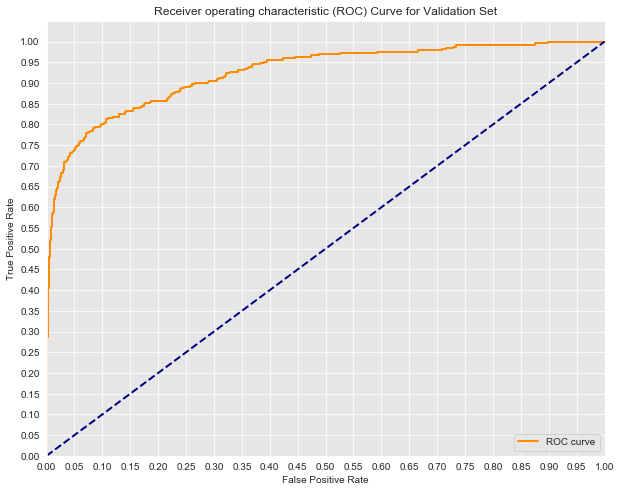

Average precision-recall score RF: 0.44314644879614806


In [84]:
y_score = logreg.decision_function(X_val_transformed)
   
fpr, tpr, thresholds = roc_curve(y_val, y_score)
y_val_score = logreg.decision_function(X_val_transformed)
val_fpr, val_tpr, thresholds = roc_curve(y_val, y_val_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Validation Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

average_precision = average_precision_score(y_val, y_val_pred)

print('Average precision-recall score RF: {}'.format(average_precision))

In [85]:
weighted_predictions_val = []
for item in logreg.predict_proba(X_val_transformed):
    if item[0] <= .85:
        weighted_predictions_val.append(1)
    else:
        weighted_predictions_val.append(0)

In [86]:
val_confusion_matrix

,predicted 0,predicted 1
actual 0,4646,138
actual 1,105,225


In [87]:
#with threshhold adjustment
pd.DataFrame(confusion_matrix(y_val, weighted_predictions_val), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

,predicted 0,predicted 1
actual 0,4202,582
actual 1,60,270


In [88]:
pred_df[pred_df['actual_class'] != pred_df['predicted_class']]
pred_df.head()

,0,1,predicted_class,actual_class
17631,0.96,0.04,0,0
20997,0.95,0.05,0,0
20465,0.98,0.02,0,0
29819,0.93,0.07,0,0
15058,0.99,0.01,0,0


In [90]:
pred_df['weighted_predictions'] = weighted_predictions_val
pred_df[pred_df['actual_class'] != pred_df['weighted_predictions']].head()

,0,1,predicted_class,actual_class,weighted_predictions
11418,0.86,0.14,0,1,0
3651,0.81,0.19,0,0,1
7166,0.84,0.16,0,0,1
13993,0.79,0.21,0,0,1
26922,0.61,0.39,0,0,1


In [91]:
df.tweet[11418]

'@user @user lock the gate! #pamgelleheracist   #mmiw #mmiwg'

#### Test Set

In [ ]:
X_train_transformed, metrics_dict, train_confusion_matrix, y_test_pred, y_test_prob, test_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_test.lem_tweet, y_test, 
                            logreg, count_vect, apply_smote = False)

In [ ]:
metrics_dict

In [ ]:
y_score = logreg.decision_function(X_train_transformed)
   
fpr, tpr, thresholds = roc_curve(y_test, y_score)
y_test_score = logreg.decision_function(X_train_transformed)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Validation Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

average_precision = average_precision_score(y_test, y_test_pred)

print('Average precision-recall score RF: {}'.format(average_precision))

In [ ]:
weighted_predictions_test = []
for item in logreg.predict_proba(X_train_transformed):
    if item[0] <= .85:
        weighted_predictions_test.append(1)
    else:
        weighted_predictions_test.append(0)

In [ ]:
pd.DataFrame(confusion_matrix(y_test, weighted_predictions_test), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

## SVM


In [319]:
#class weight = balanced + lemmatized
svm_metrics_balance, svm_X_train_transformed, svm_X_val_transformed = \
wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   SVC(class_weight ='balanced', gamma='auto', random_state = 10), vectorization_list, apply_smote=False)

NameError: name 'svm_metrics_dict' is not defined

In [320]:
pd.DataFrame(svm_metrics_balance)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.07,0.08,0.07,0.93
Train F1,0.13,0.13,0.13,0.18
Train Precision,0.07,0.07,0.07,0.54
Train Recall,1.00,1.00,1.00,0.10
Validation Accuracy,0.06,0.07,0.06,0.94
Validation F1,0.12,0.12,0.12,0.13
Validation Precision,0.06,0.06,0.06,0.50
Validation Recall,1.00,1.00,1.00,0.08


In [ ]:
#SMOTE + lemmatized 
svm_metrics_smote, svm_X_train_smote, svm_X_val_smote   = \
wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   SVC(class_weight ='balanced', gamma='auto', random_state = 10), vectorization_list, apply_smote=False)

In [ ]:
pd.DataFrame(svm_metrics_smote)

In [ ]:
#upsampling + lemmatized
svm_metrics_up, svm_X_train_up, svm_X_val_up = \
wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train, X_val_up.lem_tweet, y_val, 
                                   SVC(gamma='auto', random_state = 10), vectorization_list, apply_smote=False)
pd.DataFrame(svm_metrics_up)

#### Grid Searching:

In [ ]:
wrapper_compare_vectorizations()

In [ ]:
X_train_tfid2 =  tfidf_ngram2.fit_transform(X_train_up.lemmatized_tweet)
X_val_tfid2 =  tfidf_ngram2.transform(X_val.lemmatized_tweet)

In [ ]:
# svc = SVC(kernel='linear', C=1, gamma=1, class_weight ='balanced')

params = {
'C': [0.1,.2, .3, 0.8,1,1.2,1.4],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4]
}

svm_gs= GridSearchCV(svc, param_grid = params, cv = 3)

scores = ['f1','accuracy','recall']

In [ ]:
svm_gs.fit(X_train_tfid2, y_train_up)

In [ ]:
svm_gs.best_estimator_

In [ ]:
single_vector_model()

In [ ]:
compare_vectorization_model(X_train_up.lemmatized_tweet, y_train_up, X_val.lemmatized_tweet, y_val, 
                                   SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))

# Random Forest

### Compare Multiple Methods:

In [110]:
# Random Forest: compare vectorizers with class weight balances + lemmatizing 
rfc_metrics_bal = \
wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 10, 
                                   n_estimators = 100, class_weight='balanced', random_state=10), 
                                   vectorization_list, apply_smote=False)
pd.DataFrame(rfc_metrics_bal)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.93,0.89,0.90,0.91
Train F1,0.59,0.50,0.51,0.29
Train Precision,0.49,0.38,0.39,0.32
Train Recall,0.73,0.73,0.74,0.26
Validation Accuracy,0.91,0.88,0.88,0.90
Validation F1,0.48,0.40,0.40,0.18
Validation Precision,0.39,0.29,0.29,0.19
Validation Recall,0.62,0.62,0.61,0.17


In [111]:
# Random Forest: compare vectorizers with upsampling + lemmatizing 
rfc_metrics_up = \
wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10), 
                                   vectorization_list, apply_smote=False)
pd.DataFrame(rfc_metrics_up)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.90,0.87,0.86,0.63
Train F1,0.89,0.86,0.85,0.43
Train Precision,0.94,0.93,0.93,0.97
Train Recall,0.85,0.80,0.79,0.28
Validation Accuracy,0.91,0.91,0.91,0.93
Validation F1,0.49,0.47,0.47,0.28
Validation Precision,0.38,0.37,0.37,0.48
Validation Recall,0.68,0.63,0.64,0.19


In [112]:
# Random Forest: compare vectorizers with SMOTE + lemmatizing  
rfc_metrics_smote  = \
wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10), 
                                   vectorization_list, apply_smote=False)
pd.DataFrame(rfc_metrics_smote)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.95,0.94,0.94,0.44
Train F1,0.69,0.63,0.65,0.19
Train Precision,0.62,0.54,0.56,0.11
Train Recall,0.79,0.77,0.77,0.94
Validation Accuracy,0.93,0.90,0.90,0.41
Validation F1,0.54,0.44,0.44,0.16
Validation Precision,0.48,0.35,0.36,0.09
Validation Recall,0.62,0.58,0.59,0.86


In [113]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
single_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                    RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10), count_vect)

### Grid-Searching For Best Fit for Count Vectorizer + Upsampling

In [332]:
np.random.seed(0)
# rfc = RandomForestClassifier(n_estimators=60, max_depth=6, random_state=10, class_weight = 'balanced')

In [97]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
X_test_countvect = count_vect.transform(X_test.lem_tweet)

In [350]:
rfc = RandomForestClassifier(random_state=10)

parameters = {'n_estimators' : [40, 60, 80, 100],
'max_leaf_nodes' : [200, 400, 600],
'random_state' : [10],
'max_depth': [5, 7, 10, 20],
 'verbose' : [0],
'class_weight': ['balanced', 'balanced_subsample']}
          
rfc_gs = GridSearchCV(rfc, param_grid=parameters, cv = 3)

In [351]:
rfc_gs.fit(X_train_countvect, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [353]:
rfc_gs.best_params_

{'class_weight': 'balanced',
 'max_depth': 20,
 'max_leaf_nodes': 200,
 'n_estimators': 100,
 'random_state': 10,
 'verbose': 0}

In [354]:
rfc_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [98]:
rfc2 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [99]:
rfc2.fit(X_train_countvect, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [100]:
y_train_predict = rfc2.predict(X_train_countvect)
metrics.f1_score(y_train, y_train_predict)

0.7278624716185533

In [101]:
y_val_predict = rfc2.predict(X_val_countvect)

In [102]:
metrics.f1_score(y_val, y_val_predict)

0.5694249649368864

AttributeError: columns not found

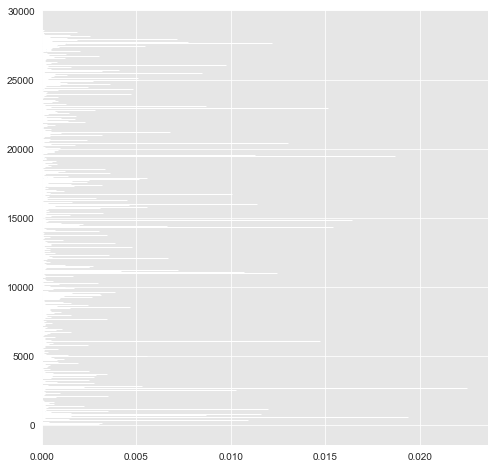

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(rfc2):
    n_features = X_val_countvect.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), rfc2.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), countvect.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rfc2)

# Word to Vec

In [ ]:
type(df.tokenized_tweet[0])

In [ ]:
(X_train.tokenized_tweet[0])

In [ ]:
X_train.tokenized_tweet.head()

### X-train pre-processing

In [ ]:
X_train.tokenized_tweet.shape

In [ ]:
# X_train['tokenized_tweet']= X_train['tokenized_tweet'].apply(eval)

In [52]:
X_train_token_list = list(X_train.tokenized_tweet)

In [53]:
type(X_train_token_list[0])

list

In [54]:
X_train_token_sumlist = sum(X_train_token_list,[])

In [55]:
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

The unique number of words in the training dataset is: 28638


#### X-val pre-processing

In [58]:
X_val_token_list = list(X_val['tokenized_tweet'])
X_val_token_sumlist = sum(X_val_token_list,[])
X_val_unique_tokens = set(X_val_token_sumlist)

print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

The unique number of words in the validation dataset is: 11739


#### X-test pre-processing

In [59]:
X_test_token_list = list(X_test['tokenized_tweet'])
X_test_token_sumlist = sum(X_test_token_list,[])

X_test_unique_tokens = set(X_test_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

The unique number of words in the training dataset is: 13677


### Training Model

In [60]:
from time import time
t = time()

w2v_model = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.07 mins


In [61]:
w2v_model.train(X_train_token_list, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

W0726 11:51:26.661659 140735734276992 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles


(1059046, 1270695)

In [62]:
w2v_model.save('data/w2v.model')

w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [63]:
w2v.corpus_count

20455

In [64]:
w2v_vocab= w2v.wv.vocab

In [395]:
len(w2v_vocab)

28638

In [396]:
w2v.wv.vectors.shape

(28638, 100)

In [397]:
w2v.wv['trump']

array([-1.0741628 ,  0.25726736, -0.28648418,  0.584742  ,  0.6637516 ,
       -0.323804  ,  0.15741855,  0.10598789,  0.65175503,  0.58140874,
       -0.6858151 ,  0.27742994, -0.7756751 ,  0.384504  ,  0.17189607,
       -0.0779872 ,  0.720414  , -0.14792329,  0.3027056 ,  0.26341632,
        0.564876  , -0.01558565, -0.2851384 , -0.5719765 ,  0.10701799,
       -0.04947015, -0.13864604, -0.15518494, -0.53318757, -0.05348621,
       -0.02617207, -0.3777389 , -0.5651622 ,  0.23554018, -0.5019818 ,
        0.28997305, -0.623897  , -0.12971206, -0.18043801, -0.18210743,
        0.1676428 , -0.13844441, -0.2695112 , -0.19630684,  0.00210546,
        0.4490902 ,  0.22908258,  0.66579163,  0.39319432,  0.03842583,
        0.07071815,  0.35224882, -0.01833265,  0.30844247,  0.573281  ,
       -0.31231984,  0.16718751,  0.06626698, -0.52159023, -0.05834407,
        0.06671209, -0.52523416,  0.00899767, -0.05377226, -0.14505701,
       -0.6625283 , -0.15970175,  0.3465464 , -0.11873607,  0.60

In [398]:
w2v.wv.most_similar(['trump'])

[('paladino', 0.8283085823059082),
 ('carl', 0.8134002685546875),
 ('obama', 0.8051496148109436),
 ('donald', 0.7897615432739258),
 ('clinton', 0.7894325852394104),
 ('remarks', 0.7865539789199829),
 ('blm', 0.7865400314331055),
 ('comments', 0.7766364812850952),
 ('obamas', 0.7705139517784119),
 ('ally', 0.7704936265945435)]

In [516]:
w2v.wv.most_similar(['racist'])

[('clinton', 0.8898996114730835),
 ('kkk', 0.8775207996368408),
 ('bigot', 0.8729462623596191),
 ('paladino', 0.8713377714157104),
 ('misogynist', 0.8632591366767883),
 ('carl', 0.8615664839744568),
 ('homophobic', 0.8582882881164551),
 ('comments', 0.858141303062439),
 ('non', 0.8573181629180908),
 ('liar', 0.85687255859375)]

In [399]:
w2v.wv.most_similar(positive=['lazy','black'])

[('brown', 0.9132056832313538),
 ('dating', 0.9076129794120789),
 ('minded', 0.907611608505249),
 ('fuckin', 0.9014075398445129),
 ('bills', 0.8978642225265503),
 ('deplorable', 0.8956817984580994),
 ('proving', 0.8955982327461243),
 ('feeding', 0.8938329815864563),
 ('letterkenny', 0.8933387994766235),
 ('besides', 0.8898042440414429)]

In [429]:
w2v.wv

In [401]:
w2v.wv.get_keras_embedding

<bound method Word2VecKeyedVectors.get_keras_embedding of <gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x1a4b048518>>

In [402]:
w2v_X = w2v.wv.vectors

## Classification with Word2Vec

In [ ]:
sentence = X_train_token_list[1]
sentence

In [65]:
X_train_w2v = np.empty((20455, 100))
for sentence in X_train_token_list:
    np.append(X_train_w2v, np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0))

X_val_w2v = np.empty((5114, 100))
for sentence in X_val_token_list:
    np.append(X_val_w2v, np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0))

In [427]:
X_train_w2v[20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
#create average vector for train and test from model
#returned list of numpy arrays are then stacked 

X_train_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_train_token_list])

X_val_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_val_token_list])

In [445]:
X_train_w2v_2[10]

array([-0.28823341,  0.07312309, -0.20851161,  0.06421986,  0.3664251 ,
       -0.06542463,  0.00562458,  0.05938577,  0.02248305,  0.02420388,
       -0.05223551,  0.09545344, -0.200593  ,  0.05784301,  0.01856432,
       -0.14747404,  0.1177594 , -0.46701664, -0.13469652,  0.06984268,
       -0.09360238,  0.23719825, -0.68535973, -0.15376803,  0.32805413,
       -0.07435187,  0.36213338, -0.10601687,  0.17945274, -0.43607683,
       -0.26756533,  0.32542747, -0.17665357,  0.15005742, -0.19501098,
        0.11132066, -0.03504308, -0.12257827,  0.05847587, -0.05714871,
        0.27701876,  0.00147894, -0.14153895, -0.08310635,  0.02631015,
        0.07375977, -0.20184338, -0.02832522, -0.02476832, -0.08871662,
        0.05824629,  0.15230941,  0.05233768,  0.08011377,  0.55853388,
        0.20630752, -0.08700915,  0.15207756, -0.12323522, -0.17290489,
       -0.12458454, -0.2057261 , -0.43881546,  0.12705594, -0.25701744,
       -0.2308612 , -0.19199194, -0.11990811,  0.16399261,  0.03

## Classification with Word Embeddings

In [67]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [68]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, LogisticRegression(solver='lbfgs'))

Train Accuracy: 0.84
Train Precision: 0.3
Train Recall: 0.86
Train F1: 0.44


Validation Accuracy: 0.85
Validation Precision: 0.28
Validation Recall: 0.79
Validation F1: 0.41


Predicted,0,1,All
Actual,,,
0,4104,680,4784
1,68,262,330
All,4172,942,5114


In [69]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, RandomForestClassifier())

Train Accuracy: 1.0
Train Precision: 0.99
Train Recall: 1.0
Train F1: 0.99


Validation Accuracy: 0.94
Validation Precision: 0.51
Validation Recall: 0.5
Validation F1: 0.5


Predicted,0,1,All
Actual,,,
0,4625,159,4784
1,165,165,330
All,4790,324,5114


### Glove

In [407]:
# from gensim.scripts.glove2word2vec import glove2word2vec

# glove_input_file = 'data/glove.twitter.27B.100d.txt'
# glove_output_file = 'data/glove.txt.word2vec'
# glove2word2vec(glove_input_file, glove_output_file)

FileNotFoundError: [Errno 2] No such file or directory: 'glove.twitter.27B.100d.txt'

In [70]:
glove_model = KeyedVectors.load_word2vec_format('data/glove.txt.word2vec', binary=False)

In [120]:
w2v.most_similar('black')

[('white', 0.8178365230560303),
 ('non', 0.7734473943710327),
 ('woman', 0.7680543661117554),
 ('asian', 0.7646945714950562),
 ('hispanic', 0.7526468634605408),
 ('brown', 0.7498205304145813),
 ('racist', 0.7466655969619751),
 ('tag', 0.740607500076294),
 ('venusexchange', 0.7382000088691711),
 ('scum', 0.7306535243988037)]

In [121]:
glove_model.most_similar('black')

[('white', 0.9390966892242432),
 ('blue', 0.8325154781341553),
 ('red', 0.7988946437835693),
 ('pink', 0.7783992290496826),
 ('green', 0.7753273844718933),
 ('purple', 0.7709735035896301),
 ('brown', 0.7628934383392334),
 ('yellow', 0.758215606212616),
 ('dark', 0.756466269493103),
 ('grey', 0.7383605241775513)]

In [471]:
glove_model['love']

array([-4.8371e-01, -2.7318e-01, -4.6840e-02,  7.0274e-01, -5.6301e-01,
       -1.7214e-01,  8.1775e-01, -6.6641e-02,  2.0224e-02, -2.3878e-01,
       -1.6122e-02, -1.7875e-01, -4.9281e+00, -4.0272e-01, -4.1190e-01,
       -1.4570e-01,  1.8508e-01, -1.9116e-01, -8.4608e-01,  6.5378e-01,
        1.2370e-01,  4.8835e-02, -3.3709e-01,  2.5834e-01,  4.7729e-01,
       -8.8145e-01, -1.3083e-01,  7.9499e-01,  8.6216e-02, -9.1803e-01,
       -9.6671e-01, -4.8309e-01, -4.0963e-01,  1.6920e-01,  2.3241e-01,
       -2.0524e-02,  2.2267e-01, -2.6763e-01,  1.4378e-01, -4.6547e-02,
       -1.1726e+00, -3.5298e-02,  2.8347e-01,  4.3446e-01,  1.8472e-01,
        3.3065e-01,  6.7848e-02, -7.6485e-01,  1.8351e-01, -6.4361e-01,
       -7.5015e-01, -4.2583e-02,  2.4262e-01, -6.4108e-01,  6.9741e-01,
       -2.3133e-01, -2.1454e-01,  3.1040e-01,  2.3161e-01,  6.8397e-02,
        8.1428e-02, -3.9331e-01, -1.0927e+00, -4.2618e-02, -9.6970e-02,
        3.1243e-01, -1.0463e+00,  2.8207e-01, -7.2446e-01,  3.14

In [119]:
X_train_token_list[0]

['model',
 'i',
 'love',
 'u',
 'take',
 'with',
 'u',
 'all',
 'the',
 'time',
 'in',
 'ur']

In [477]:
X_train_glove2 = np.empty((20455, 100))
for sentence in X_train_token_list:
    np.append(X_train_glove2, np.mean([glove_model[w] for w in sentence if w in glove_model]
                   or [np.zeros(100)], axis=0))

In [71]:
X_train_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_train_token_list])
X_val_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_val_token_list])

In [116]:
X_train_w2v[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [117]:
X_train_w2v_2[10]

array([-0.028505  , -0.04374214,  0.18586859, -0.01696486, -0.47875792,
        0.01426772, -0.25949828,  0.34069775, -0.01975948, -0.3021883 ,
        0.05335021,  0.33508971, -0.37468172, -0.15916829,  0.33115939,
        0.23021236,  0.10092731, -0.01055496, -0.22143245, -0.2765775 ,
       -0.11729609,  0.59136347,  0.0837363 ,  0.22692289,  0.14306551,
        0.17185371, -0.31483988,  0.04305273, -0.1257824 , -0.38313468,
        0.02947778,  0.0759358 ,  0.08734205, -0.01308978,  0.04350968,
        0.10200389,  0.14046779, -0.45173085, -0.07938617, -0.34419653,
       -0.16534324,  0.14472922,  0.28601627,  0.13695804,  0.16271638,
       -0.12347816,  0.13635907, -0.36715094, -0.00888368,  0.11414939,
       -0.15993796,  0.0929606 , -0.41119229, -0.02858371, -0.12876672,
       -0.03553657, -0.13776215,  0.31243446,  0.28799529, -0.03698096,
        0.05387536,  0.2913464 , -0.40524991, -0.08885277, -0.24015333,
       -0.11776452, -0.12920914, -0.20915868, -0.19259807,  0.35

In [ ]:
X_train_glove[255]

In [72]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression (class_weight='balanced'))

Train Accuracy: 0.88
Train Precision: 0.01
Train Recall: 0.01
Train F1: 0.01


Validation Accuracy: 0.89
Validation Precision: 0.02
Validation Recall: 0.01
Validation F1: 0.01


Predicted,0,1,All
Actual,,,
0,4537,247,4784
1,326,4,330
All,4863,251,5114


##  Testing Scraped Trump Tweets

In [492]:
trump_df= pd.read_csv('data/cleaned-trump-tweet.csv')
trump_df.head()

,Unnamed: 0,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,0,So Robert Mueller has now asked for his long t...,Robert Mueller asked long time Never Trumper l...,Robert Mueller asked long time Never Trumper l...,"['Robert', 'Mueller', 'asked', 'long', 'time',...","['robert', 'mueller', 'ask', 'long', 'time', '...","['Robert', 'Mueller', 'asked', 'long', 'time',...",Robert Mueller asked long time Never Trumper l...,robert mueller asked long time never trumper l...
1,1,The young leaders here today (@TPUSA) are part...,young leaders here today part movement unlike ...,young leaders here today part movement unlike ...,"['young', 'leaders', 'here', 'today', 'part', ...","['young', 'leader', 'here', 'today', 'part', '...","['young', 'leader', 'here', 'today', 'part', '...",young leaders here today part movement unlike ...,young leaders here today part movement unlike ...
2,2,Congratulations to our new Secretary of Defens...,Congratulations Secretary Defense Mark twitter,Congratulations Secretary Defense Mark twitter,"['Congratulations', 'Secretary', 'Defense', 'M...","['congratul', 'secretari', 'defens', 'mark', '...","['Congratulations', 'Secretary', 'Defense', 'M...",Congratulations Secretary Defense Mark twitter,congratulations secretary defense mark twitt
3,3,"Oh well, we still have the great @seanhannity ...",well still have great hear really strong show ...,well still have great hear really strong show ...,"['well', 'still', 'have', 'great', 'hear', 're...","['well', 'still', 'have', 'great', 'hear', 're...","['well', 'still', 'have', 'great', 'hear', 're...",well still have great hear really strong show ...,well still have great hear really strong show ...
4,4,THANK YOU @TPUSA! #MAGApic.twitter.com/1eqR2Im8dQ,THANK #MAGApic twitter,THANK MAGApic twitter,"['THANK', 'MAGApic', 'twitter']","['thank', 'magap', 'twitter']","['THANK', 'MAGApic', 'twitter']",THANK MAGApic twitter,thank magapic twitt


In [493]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)

In [494]:
logreg = LogisticRegression(class_weight='balanced')

In [495]:
logreg.fit(X_train_countvect, y_train_up)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [496]:
X_trump = count_vect.transform(trump_df.lem_tweet)

In [497]:
X_trump = X_trump.toarray()

In [498]:
X_trump.shape

(20, 28610)

In [499]:
y_trump_predict = logreg.predict(X_trump)

In [500]:
y_trump_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [501]:
trump_df['predictions'] = y_trump_predict

In [502]:
y_trump_predict_prob = logreg.predict_proba(X_trump)

In [503]:
y_trump_predict_prob = pd.DataFrame(y_trump_predict_prob)

In [504]:
trump_df['predict_probability'] = y_trump_predict_prob[0]

In [505]:
trump_df = trump_df[['tweet','predictions', 'predict_probability']]


In [506]:
trump0 = trump_df[trump_df.predictions == 0]

In [507]:
pd.set_option('display.max_colwidth', -1)

In [508]:
trump0.tweet

0     So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!                        
1     The young leaders here today (@TPUSA) are part of a movement unlike anything in the history of our nation. It is a movement about reclaiming YOUR future, rebuilding YOUR Country, restoring YOUR destiny, and renewing the values that are the true source of American GREATNESS!pic.twitter.com/unURpLS8Lc
2     Congratulations to our new Secretary of Defense, Mark @EsperDoD!pic.twitter.com/aT3D1ZX5KK                                                                                                                                                                                                                  
3     Oh well, we still have the great @seanhannity who I hear has a really str

In [509]:
trump_df

,tweet,predictions,predict_probability
0,So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!,0,0.955340
1,"The young leaders here today (@TPUSA) are part of a movement unlike anything in the history of our nation. It is a movement about reclaiming YOUR future, rebuilding YOUR Country, restoring YOUR destiny, and renewing the values that are the true source of American GREATNESS!pic.twitter.com/unURpLS8Lc",0,0.870890
2,"Congratulations to our new Secretary of Defense, Mark @EsperDoD!pic.twitter.com/aT3D1ZX5KK",0,0.978122
3,"Oh well, we still have the great @seanhannity who I hear has a really strong show tonight. 9:00 P.M.",0,0.999288
4,THANK YOU @TPUSA! #MAGApic.twitter.com/1eqR2Im8dQ,0,0.937782
5,Just watched Rep. Eric Swalwell be asked endless softball questions by @marthamaccallum on @FoxNews about the phony Witch Hunt. He was just forced out of the Democrat Presidential Primary because he polled at ZERO. Fox sure ain’t what it used to be. Too bad!,0,0.953525
6,"Just got back only to hear of a last minute change allowing a Never Trumper attorney to help Robert Mueller with his testimony before Congress tomorrow. What a disgrace to our system. Never heard of this before. VERY UNFAIR, SHOULD NOT BE ALLOWED. A rigged Witch Hunt!",0,0.999638
7,"Budget Deal gives great victories to our Military and Vets, keeps out Democrat poison pill riders. Republicans and Democrats in Congress need to act ASAP and support this deal.",1,0.032784
8,"....I got to know him over his many years as Chairman of the Police Athletic League, for which he devoted so much time and energy. Bob Morgenthau, a legend, will be greatly missed!",0,0.977587
9,"I was saddened to learn of the recent passing of Bob Morgenthau, a truly great man! Bob served as a Naval Officer in World War II, was an extraordinary US Attorney, Manhattan District Attorney, and always a warrior for our Country that he loved so dearly....",0,0.840154


In [510]:
trump_df[trump_df.predictions == 0]

,tweet,predictions,predict_probability
0,So Robert Mueller has now asked for his long time Never Trumper lawyer to sit beside him and help with answers. What’s this all about? His lawyer represented the “basement server guy” who got off free in the Crooked Hillary case. This should NOT be allowed. Rigged Witch Hunt!,0,0.955340
1,"The young leaders here today (@TPUSA) are part of a movement unlike anything in the history of our nation. It is a movement about reclaiming YOUR future, rebuilding YOUR Country, restoring YOUR destiny, and renewing the values that are the true source of American GREATNESS!pic.twitter.com/unURpLS8Lc",0,0.870890
2,"Congratulations to our new Secretary of Defense, Mark @EsperDoD!pic.twitter.com/aT3D1ZX5KK",0,0.978122
3,"Oh well, we still have the great @seanhannity who I hear has a really strong show tonight. 9:00 P.M.",0,0.999288
4,THANK YOU @TPUSA! #MAGApic.twitter.com/1eqR2Im8dQ,0,0.937782
5,Just watched Rep. Eric Swalwell be asked endless softball questions by @marthamaccallum on @FoxNews about the phony Witch Hunt. He was just forced out of the Democrat Presidential Primary because he polled at ZERO. Fox sure ain’t what it used to be. Too bad!,0,0.953525
6,"Just got back only to hear of a last minute change allowing a Never Trumper attorney to help Robert Mueller with his testimony before Congress tomorrow. What a disgrace to our system. Never heard of this before. VERY UNFAIR, SHOULD NOT BE ALLOWED. A rigged Witch Hunt!",0,0.999638
8,"....I got to know him over his many years as Chairman of the Police Athletic League, for which he devoted so much time and energy. Bob Morgenthau, a legend, will be greatly missed!",0,0.977587
9,"I was saddened to learn of the recent passing of Bob Morgenthau, a truly great man! Bob served as a Naval Officer in World War II, was an extraordinary US Attorney, Manhattan District Attorney, and always a warrior for our Country that he loved so dearly....",0,0.840154
10,Leaving for Turning Point USA. Will be speaking to some of the greatest and smartest young people on the planet. See you there!,0,0.972643


In [511]:
trump1 = trump_df[trump_df.predictions == 1]

In [512]:
trump1.tweet

7     Budget Deal gives great victories to our Military and Vets, keeps out Democrat poison pill riders. Republicans and Democrats in Congress need to act ASAP and support this deal.                                                                                                        
11    When an old Wall at the Southern Border, that is crumbling and falling over, built in an important section to keep out problems, is replaced with a brand new 30 foot high steel and concrete Wall, the Media says no new Wall has been built. Fake News! Building lots of Wall!        
12    In 2016 I almost won Minnesota. In 2020, because of America hating anti-Semite Rep. Omar, & the fact that Minnesota is having its best economic year ever, I will win the State! “We are going to be a nightmare to the President,” she say. No, AOC Plus 3 are a Nightmare for America!
16    KEEP AMERICA GREAT!                                                                                                                  